In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

## Leitura dos Dados

In [2]:
data = pd.read_csv('https://www.ic.unicamp.br/~wainer/cursos/2s2021/433/ex2-data.csv', delim_whitespace=True, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-10.63,-3.91,27.69,2.32,-8.17,-6.15,-2.45,-10.30,-5.62,7.98,5.32,1.35,-4.56
1,12.56,-19.50,4.39,1.53,-3.55,-15.97,-9.16,4.88,5.72,1.58,-3.41,-1.85,2.55
2,4.19,-12.30,-22.25,-6.14,7.47,12.42,6.47,-3.35,-10.22,8.19,5.50,11.08,-2.19
3,-6.38,-18.36,-6.67,-1.42,-3.67,13.01,3.23,-7.46,-3.01,-4.39,-3.40,-1.06,8.25
4,-16.33,0.41,1.56,-10.51,9.37,-3.81,-5.21,-2.16,-6.41,-8.93,-8.05,3.81,2.76


In [4]:
data.shape

(1000, 13)

## K-Means

In [5]:
n_clusters = range(2,16)
silhouette_scores = []
davies_scores = []

In [6]:
for n_cluster in n_clusters:
    clusterer = KMeans(n_clusters=n_cluster)
    clusterer.fit(data.values)
    
    s_score = silhouette_score(data.values, clusterer.labels_)
    davies_score = davies_bouldin_score(data.values, clusterer.labels_)
    silhouette_scores.append(s_score)
    davies_scores.append(davies_score)

## Medidas Internas de Qualidade

Nessas medidas o melhor K é dado pela silhueta maxima e Davies minímo

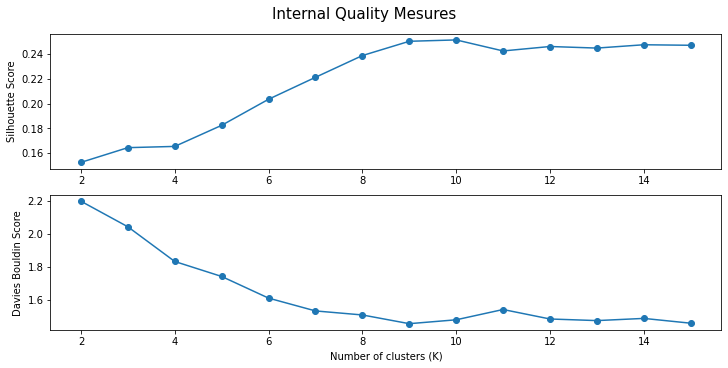

In [7]:
fig, ax = plt.subplots(2, 1, constrained_layout = True, figsize=(10,5))

ax[0].plot(n_clusters, silhouette_scores, marker='o')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(n_clusters, davies_scores, marker='o')
ax[1].set_ylabel('Davies Bouldin Score')

fig.suptitle('Internal Quality Mesures', fontsize=15)
plt.xlabel("Number of clusters (K)")

plt.show()
